In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src') 

from utils.data_loader import load_data

# Load data
df = load_data('../data/META_historical_data.csv')


Data loaded successfully from ../data/META_historical_data.csv


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


In [13]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


1. Summary Statistics & Missing-Value Report

In [14]:
print(df.describe(include='all'))

              Date         Open         High          Low        Close  \
count         2926  2926.000000  2926.000000  2926.000000  2926.000000   
unique        2926          NaN          NaN          NaN          NaN   
top     2024-07-30          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN   179.557215   181.875331   177.317761   179.649453   
std            NaN   108.864895   110.256219   107.511134   108.906971   
min            NaN    22.990000    23.090000    22.670000    22.900000   
25%            NaN    97.767502    98.772499    95.889997    97.382498   
50%            NaN   166.870003   168.850006   164.210007   166.855003   
75%            NaN   231.450005   234.934998   228.687504   232.424999   
max            NaN   542.349976   542.809998   528.359985   539.909973   

          Adj Close        Volume    Dividends  Stock Splits  
count   2926.000000  2.926000e+03  2926.000000  

In [15]:
number_stats = df.describe(include=[np.number])  # Only numeric columns
print(number_stats)

              Open         High          Low        Close    Adj Close  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    179.557215   181.875331   177.317761   179.649453   179.305921   
std     108.864895   110.256219   107.511134   108.906971   108.755055   
min      22.990000    23.090000    22.670000    22.900000    22.853037   
25%      97.767502    98.772499    95.889997    97.382498    97.182795   
50%     166.870003   168.850006   164.210007   166.855003   166.512825   
75%     231.450005   234.934998   228.687504   232.424999   231.948360   
max     542.349976   542.809998   528.359985   539.909973   539.909973   

             Volume    Dividends  Stock Splits  
count  2.926000e+03  2926.000000        2926.0  
mean   2.872083e+07     0.000342           0.0  
std    2.269811e+07     0.013070           0.0  
min    5.467500e+06     0.000000           0.0  
25%    1.571308e+07     0.000000           0.0  
50%    2.176100e+07     0.000000       

In [16]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

2. Covert date to datetime

In [17]:
print(df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


Outliers

In [18]:
# For prices, we typically want to keep genuine market movements
# But we can verify if extreme prices coincide with splits:

# Check if max price coincides with stock splits
max_price_date = df[df['Close'] == df['Close'].max()].index[0]
split_on_max = df.loc[max_price_date, 'Stock Splits']
print(f"Stock split on max price date: {split_on_max}")


Stock split on max price date: 0.0


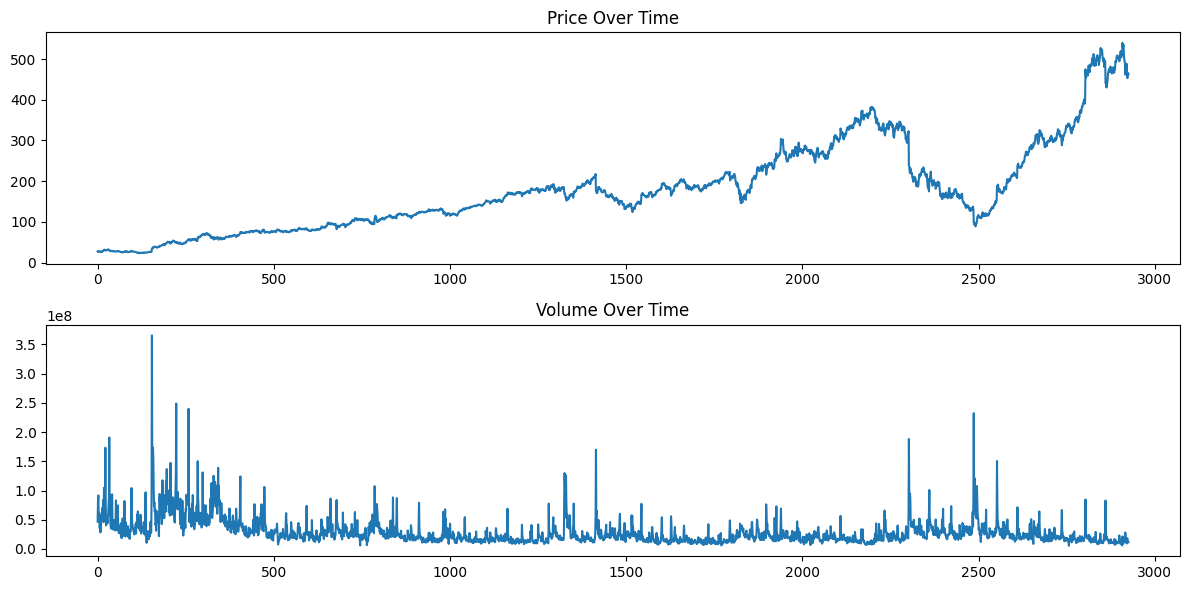

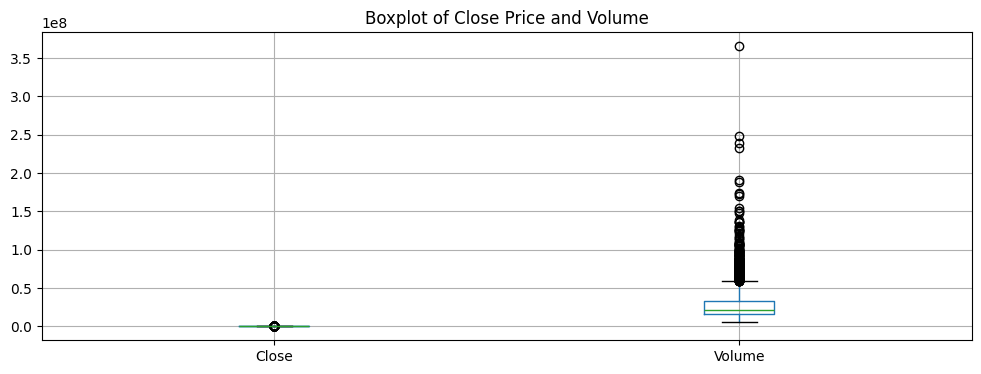

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'])
plt.title('Price Over Time')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volume'])
plt.title('Volume Over Time')
plt.tight_layout()
plt.show()

# Boxplots for visual outlier detection
plt.figure(figsize=(12, 4))
df[['Close', 'Volume']].boxplot()
plt.title('Boxplot of Close Price and Volume')
plt.show()

In [20]:
# save cleaned data
df.to_csv('../data/META_cleaned.csv', index=False)